In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

simDir = './2DConYescala/'
simDir2 = './2D_medium/'

nseeds = 64
lc = 16
con = [0,1,2,3]
st_con = ['NS', 'ICS', 'HCS', 'LCS']
var_lab = [0.5,2,7]
scales = np.array([1,2,4,8,16,32,64,128,256,512,1024])
scale_att = np.linspace(1,max(scales),1000)

linestyle = ['dotted', 'dashed', 'dashdot']
marker = ['x', 'o', 's']
color = ['c', 'g', 'r', 'b']

In [27]:
### FG values 1 ###

aux_job = 0
k_FG = np.array([])
kg_FG = np.array([])
var_FG = np.array([])
for icon in range(len(con)):
    k = np.array([])
    kg = np.array([])
    var = np.array([])
    for ivar in range(len(var_lab)):
        job = aux_job
        k1 = np.array([])
        kg1 = np.array([])
        var1 = np.array([])
        for iseed in range(nseeds):
            aux = np.load(simDir2+str(job)+'/k.npy').reshape(-1)
            k1 = np.append(k1, np.mean(aux))
            kg1 = np.append(kg1, np.exp(np.mean(np.log(aux))))
            var1 = np.append(var1, np.var(np.log(aux)))
            job +=1
        aux_job = job
        k = np.append(k, np.mean(k1))
        kg = np.append(kg, np.mean(kg1))
        var = np.append(var, np.mean(var1))
    k_FG = np.append(k_FG, k)
    kg_FG = np.append(kg_FG, kg)
    var_FG = np.append(var_FG, var)
k_FG = np.reshape(k_FG, (4,3))
kg_FG = np.reshape(kg_FG, (4,3))
var_FG = np.reshape(var_FG, (4,3))
print(k_FG, k_FG.shape)
print(kg_FG, kg_FG.shape)
print(var_FG, var_FG.shape)

[[ 1.28398129  2.71782469 33.02768232]
 [ 1.28207157  2.71578731 34.28718915]
 [ 1.28676618  2.72664345 33.24683922]
 [ 1.28050489  2.7153985  34.53342753]] (4, 3)
[[0.99994107 0.99988268 0.99978225]
 [0.99909843 0.99833619 0.99733706]
 [1.00281615 1.00576506 1.01122082]
 [0.99731575 0.99476256 0.99062645]] (4, 3)
[[0.50007536 2.00030144 7.00105504]
 [0.49798813 1.99195254 6.97183388]
 [0.49891561 1.99566242 6.98481848]
 [0.49891561 1.99566242 6.98481848]] (4, 3)


In [28]:
### Fine grid values 2 ###

aux_job = 0
k_FG_2 = np.array([])
kg_FG_2 = np.array([])
var_FG_2 = np.array([])
for icon in range(len(con)):
    k = np.array([])
    kg = np.array([])
    var = np.array([])
    for ivar in range(len(var_lab)):
        job = aux_job
        k1 = np.array([])
        kg1 = np.array([])
        var1 = np.array([])
        for iseed in range(nseeds):
            k1 = np.append(k1, np.loadtxt(simDir+str(job)+'/medium_stats.txt')[2])
            kg1 = np.append(kg1, np.loadtxt(simDir+str(job)+'/medium_stats.txt')[0])
            var1 = np.append(var1, np.loadtxt(simDir+str(job)+'/medium_stats.txt')[1])
            job +=1
        aux_job = job
        k = np.append(k, np.mean(k1))
        kg = np.append(kg, np.mean(kg1))
        var = np.append(var, np.mean(var1))
    k_FG_2 = np.append(k_FG_2, k)
    kg_FG_2 = np.append(kg_FG_2, kg)
    var_FG_2 = np.append(var_FG_2, var)
k_FG_2 = np.reshape(k_FG_2, (4,3))
kg_FG_2 = np.reshape(kg_FG_2, (4,3))
var_FG_2 = np.reshape(var_FG_2, (4,3))
print(k_FG_2, k_FG_2.shape)
print(kg_FG_2, kg_FG_2.shape)
print(var_FG_2, var_FG_2.shape)

[[ 1.28398129  2.71782469 33.02768232]
 [ 1.28207157  2.71578731 34.28718915]
 [ 1.28676619  2.72664386 33.24768218]
 [ 1.28050489  2.7153985  34.53342753]] (4, 3)
[[-5.91943844e-05 -1.18388769e-04 -2.21485106e-04]
 [-9.71717152e-04 -1.94343430e-03 -3.63583266e-03]
 [ 2.75005806e-03  5.50011611e-03  1.02897750e-02]
 [-2.75005806e-03 -5.50011611e-03 -1.02897750e-02]] (4, 3)
[[0.50007536 2.00030144 7.00105504]
 [0.49798813 1.99195254 6.97183388]
 [0.49891561 1.99566242 6.98481849]
 [0.49891561 1.99566242 6.98481849]] (4, 3)


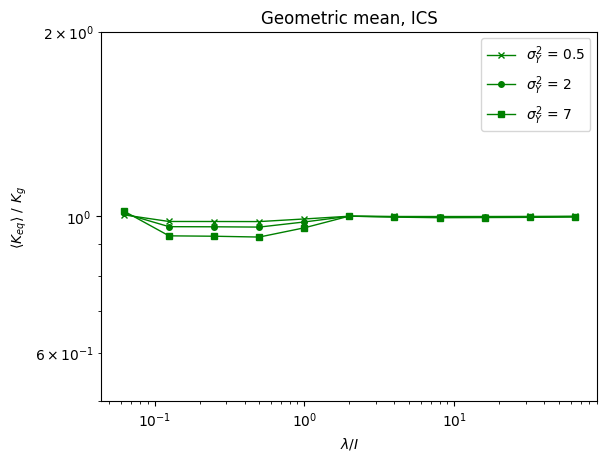

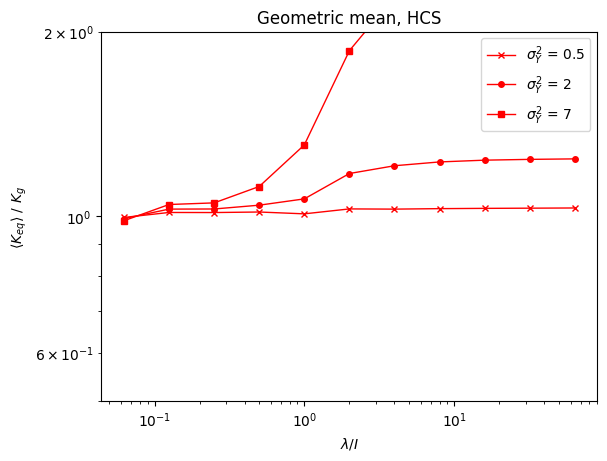

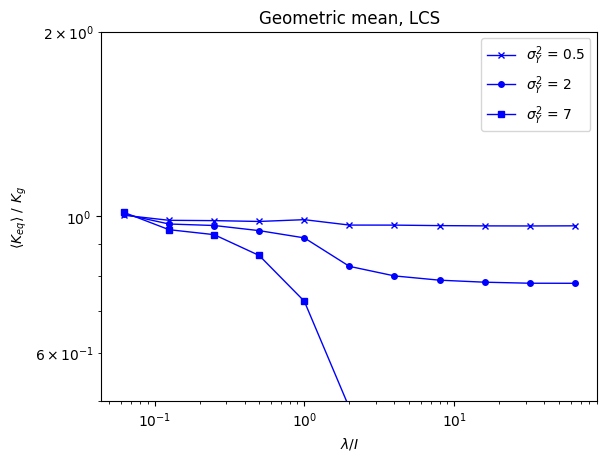

In [44]:
### Geometric mean ###

aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        keff = np.ones(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            job = aux_job
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(simDir2+str(job)+'/k.npy').reshape(-1)
                elif scale == scales[-1]: #or (scale>1 and icon==0):
                    aux = np.append(aux, np.array([np.loadtxt(simDir+str(job)+'/SolverRes.txt')[0]]))
                else:
                    try:
                        aux=np.append(aux, np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
                job += 1
            keff[iscale] = np.exp(np.mean(np.log(aux)))
        aux_job = job
        if icon == 1 or icon == 2 or icon == 3:
            plt.loglog(scales/lc, keff/kg_FG[icon][ivar], label=r'$\sigma^2_{Y}$'+' = '+str(var_lab[ivar]), color=color[icon], marker=marker[ivar], 
                markersize=4, linewidth=1)
            plt.title('Geometric mean'+', '+st_con[icon])
            plt.xlabel(r'$\lambda / I$')
            plt.ylabel(r'$⟨K_{eq}⟩ \ / \ K_{g}$')
            plt.ylim(0.5,2)
          
            #plt.axvline(x=1)
            plt.legend()
    plt.show()
plt.close()    

In [37]:
gmean = np.load(simDir+str(192)+'/KpostProcess/Kperm'+str(4)+'.npy').reshape(-1)
print(gmean, gmean.shape)
k=1
for i in range(65536):
    k *= gmean[i]

gmean_calc = k ** (1/65536)
print(gmean_calc)

[1.31223409 1.60324832 1.71921733 ... 1.14718631 0.73275327 0.50837658] (65536,)
0.0


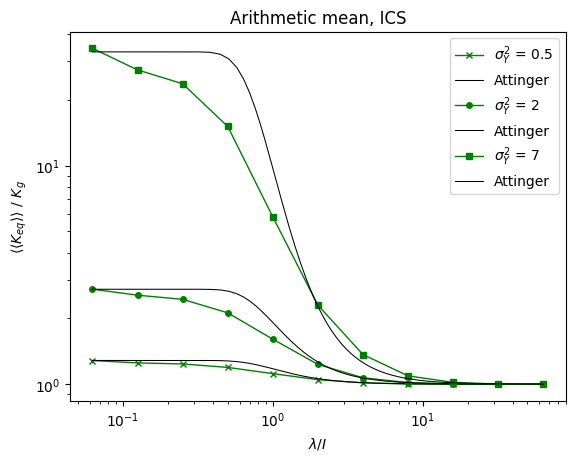

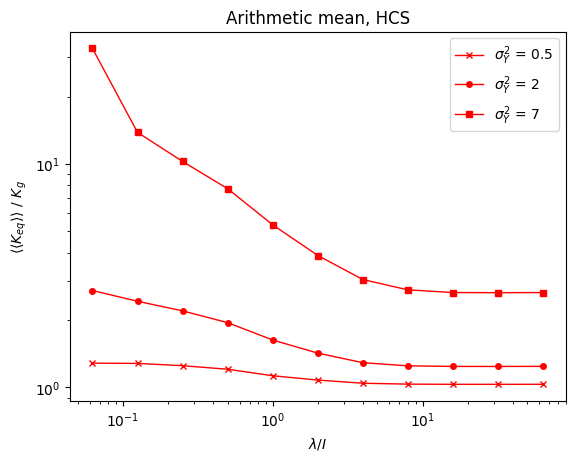

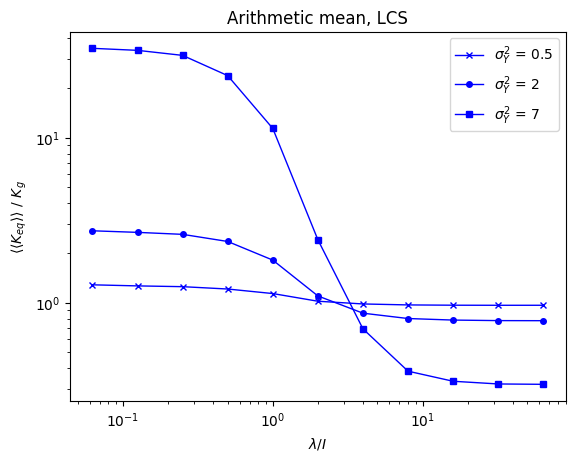

In [48]:
### Arithmetic mean ###

def attinger_amean(variance, scale, a, lc, Kg): 
    keff_scale = Kg * np.exp((variance/2)*(erf((lc*a)/(np.sqrt(2)*scale)))**2)
    return keff_scale

aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        keff = np.ones(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            job = aux_job
            for iseed in range(nseeds):
                if scale == 1 and iseed == 0:
                    aux = k_FG[icon][ivar]#np.load(simDir2+str(job)+'/k.npy').reshape(-1)
                elif scale == scales[-1]: #or (scale>1 and icon==0):
                    aux = np.append(aux, np.array([np.loadtxt(simDir+str(job)+'/SolverRes.txt')[0]]))
                else:
                    try:
                        aux=np.append(aux, np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
                job += 1
            keff[iscale] = np.mean(aux)
        aux_job = job
        if icon == 1 or icon == 2 or icon == 3:
            plt.loglog(scales/lc, keff/kg_FG[icon][ivar], label=r'$\sigma^2_{Y}$'+' = '+str(var_lab[ivar]), color=color[icon], marker=marker[ivar], 
                markersize=4, linewidth=1)
            plt.title('Arithmetic mean'+', '+st_con[icon])
            plt.xlabel(r'$\lambda / I$')
            plt.ylabel(r'$⟨⟨K_{eq}⟩⟩ \ / \ K_{g}$')
            plt.legend()
        if icon == 1:
            plt.loglog(scale_att/lc, attinger_amean(var_lab[ivar], scale_att, 1.3, lc, 1), label='Attinger', 
                color='black', linewidth=0.75) 
            plt.legend() 
    plt.show()
plt.close()   

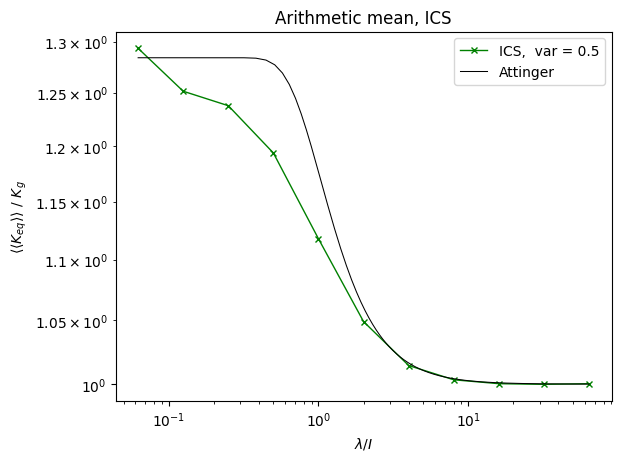

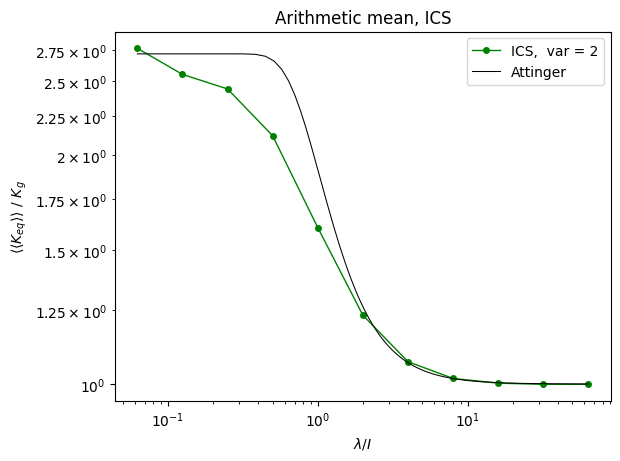

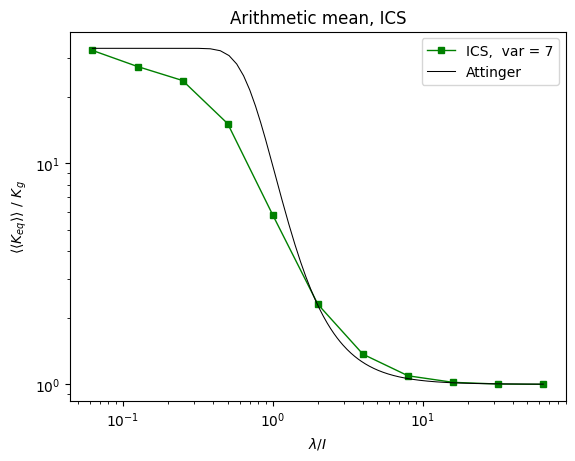

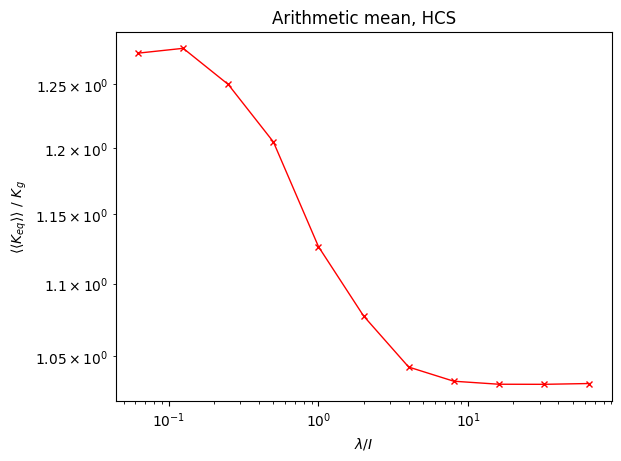

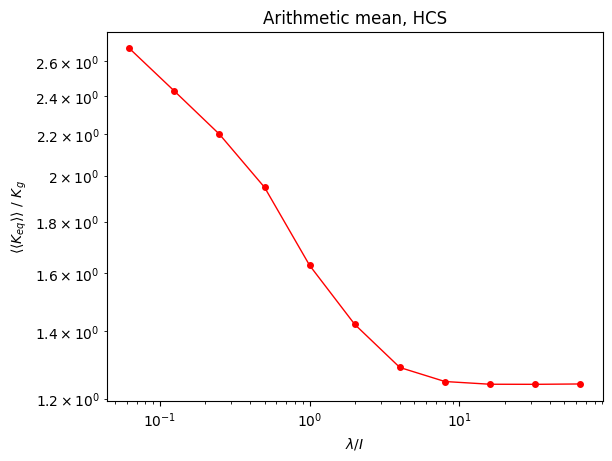

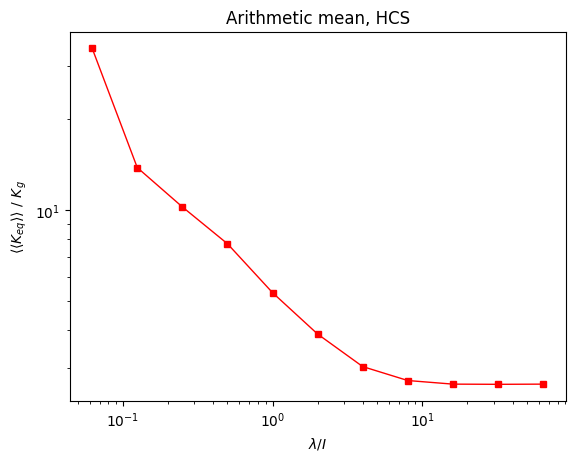

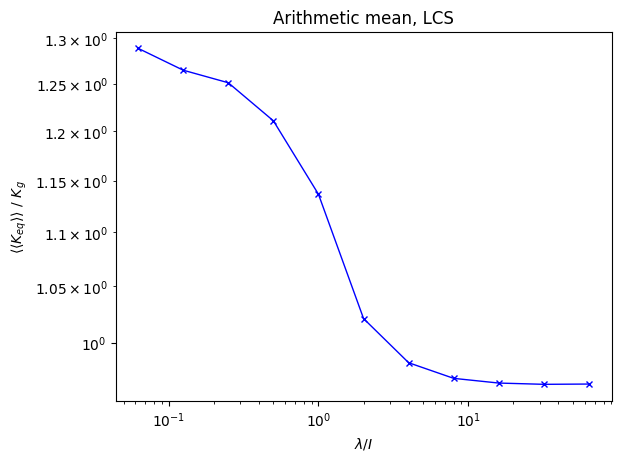

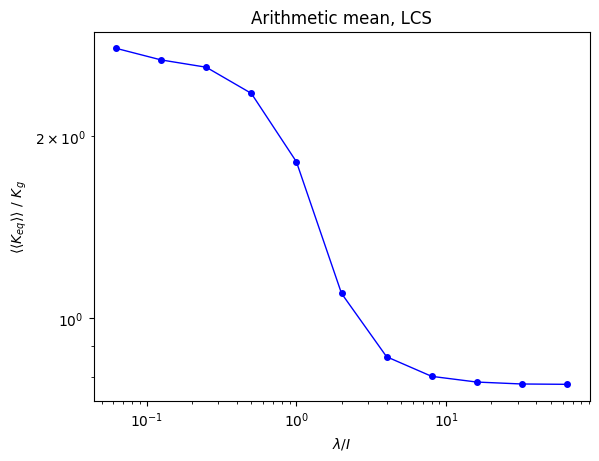

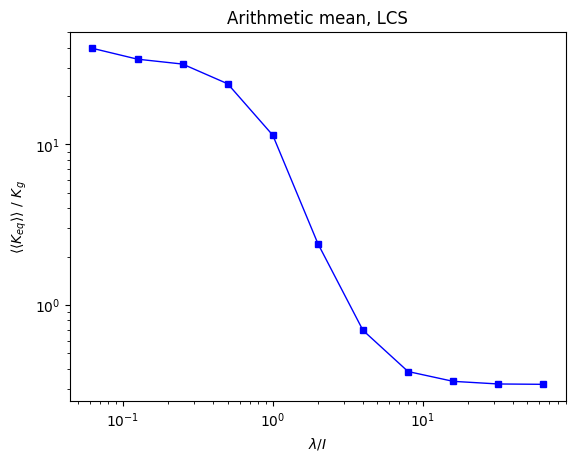

In [49]:
### Arithmetic mean ###

def attinger_amean(variance, scale, a, lc, Kg): 
    keff_scale = Kg * np.exp((variance/2)*(erf((lc*a)/(np.sqrt(2)*scale)))**2)
    return keff_scale

aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        keff = np.ones(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            job = aux_job
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(simDir2+str(job)+'/k.npy').reshape(-1)
                elif scale == scales[-1]: #or (scale>1 and icon==0):
                    aux = np.append(aux, np.array([np.loadtxt(simDir+str(job)+'/SolverRes.txt')[0]]))
                else:
                    try:
                        aux=np.append(aux, np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
                job += 1
            keff[iscale] = np.mean(aux)
        aux_job = job
        if icon == 1 or icon == 2 or icon == 3:
            plt.loglog(scales/lc, keff/kg_FG[icon][ivar], label=st_con[icon]+', '+' var = '+str(var_lab[ivar]), color=color[icon], marker=marker[ivar], 
                markersize=4, linewidth=1)
            plt.title('Arithmetic mean'+', '+st_con[icon])
            plt.xlabel(r'$\lambda / I$')
            plt.ylabel(r'$⟨⟨K_{eq}⟩⟩ \ / \ K_{g}$')
        if icon == 1:
            plt.loglog(scale_att/lc, attinger_amean(var_lab[ivar], scale_att, 1.3, lc, 1), label='Attinger', 
                color='black', linewidth=0.75) 
            plt.legend() 
        plt.show()
plt.close()   

/home/chris/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/chris/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/chris/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


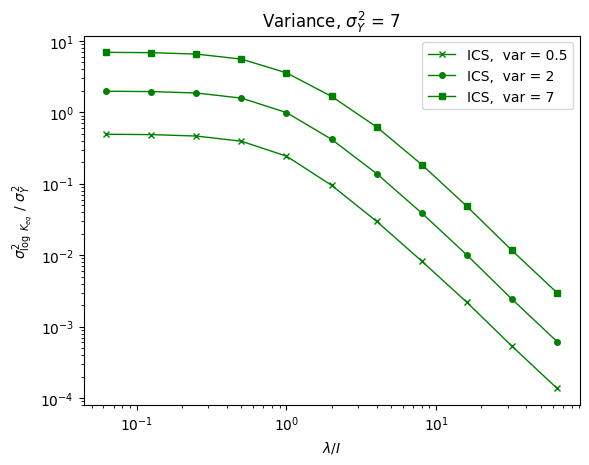

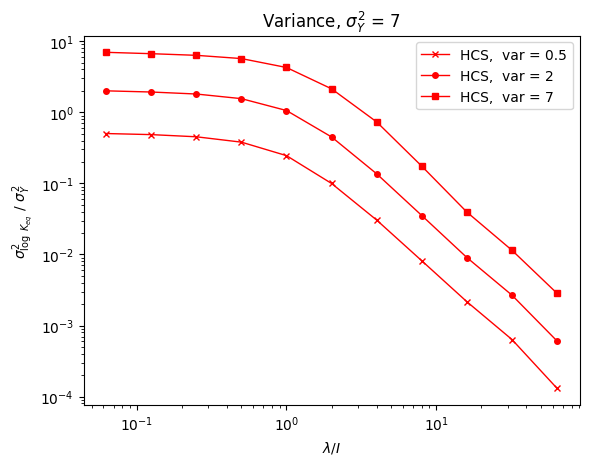

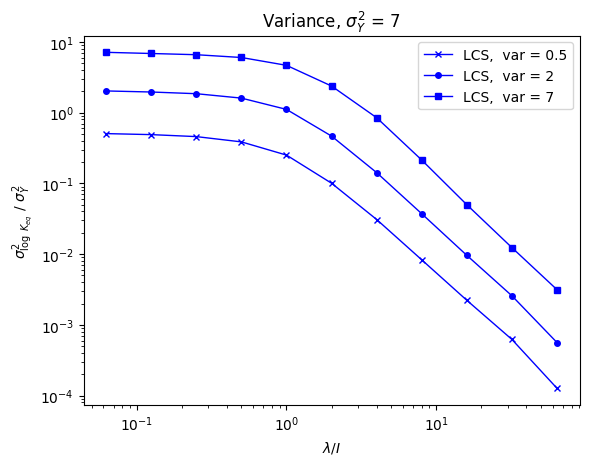

In [7]:
### Variance ###

aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        keff = np.ones(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            job = aux_job
            for iseed in range(nseeds):
                if scale == 1 and iseed == 0:
                    aux = np.load(simDir2+str(job)+'/k.npy').reshape(-1)
                elif scale == scales[-1]: #or (scale>1 and icon==0):
                    aux = np.append(aux, np.array([np.loadtxt(simDir+str(job)+'/SolverRes.txt')[0]]))
                else:
                    try:
                        aux=np.append(aux, np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
                job += 1
            keff[iscale] = np.var(np.log(aux))
        aux_job = job
        if icon == 1 or icon == 2 or icon == 3:
            plt.loglog(scales/lc, keff/kg_FG[icon][ivar], label=st_con[icon]+', '+' var = '+str(var_lab[ivar]), color=color[icon], marker=marker[ivar], 
                markersize=4, linewidth=1)
            plt.title('Variance'+', '+r'$\sigma^2_{Y}$'+' = '+ str(var_lab[ivar]))
            plt.xlabel(r'$\lambda / I$')
            plt.ylabel(r"$\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{Y}$")
        
            plt.legend()
    plt.show()
plt.close() 

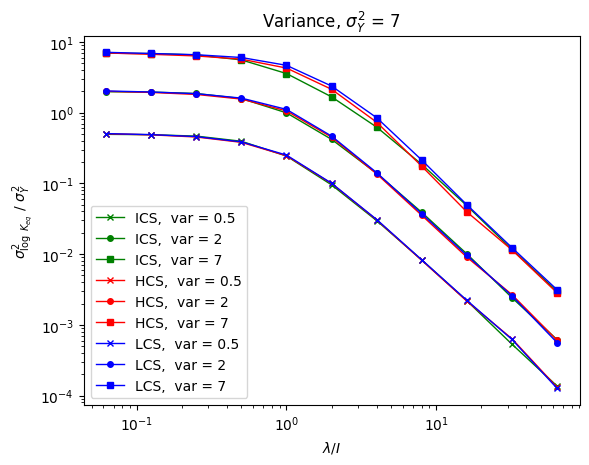

In [8]:
### Variance ###

aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        keff = np.ones(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            job = aux_job
            for iseed in range(nseeds):
                if scale == 1 and iseed == 0:
                    aux = np.load(simDir2+str(job)+'/k.npy').reshape(-1)
                elif scale == scales[-1]: #or (scale>1 and icon==0):
                    aux = np.append(aux, np.array([np.loadtxt(simDir+str(job)+'/SolverRes.txt')[0]]))
                else:
                    try:
                        aux=np.append(aux, np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
                job += 1
            keff[iscale] = np.var(np.log(aux))
        aux_job = job
        if icon == 1 or icon == 2 or icon == 3:
            plt.loglog(scales/lc, keff/kg_FG[icon][ivar] ,label=st_con[icon]+', '+' var = '+str(var_lab[ivar]), color=color[icon], marker=marker[ivar], 
                markersize=4, linewidth=1)
            plt.title('Variance'+', '+r'$\sigma^2_{Y}$'+' = '+ str(var_lab[ivar]))
            plt.xlabel(r'$\lambda / I$')
            plt.ylabel(r"$\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{Y}$")
            plt.legend()
plt.show()
plt.close() 

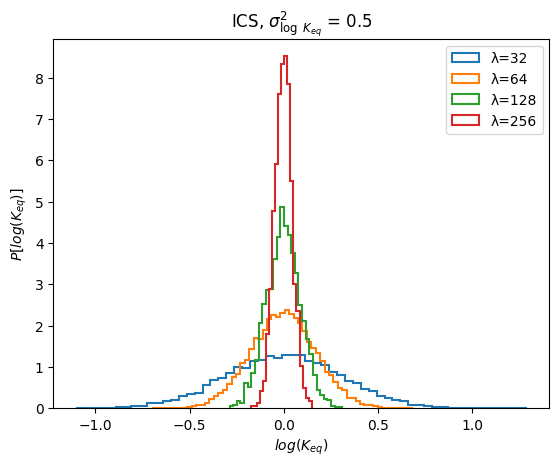

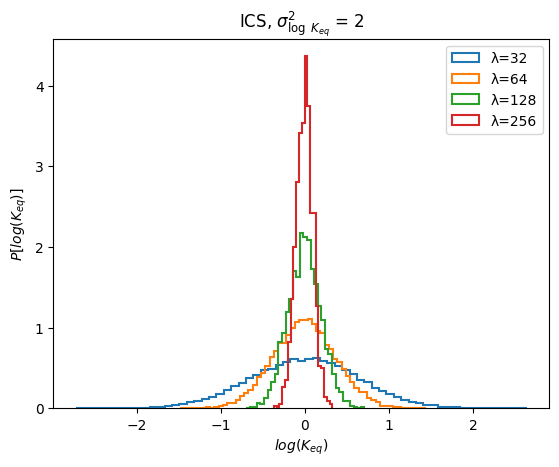

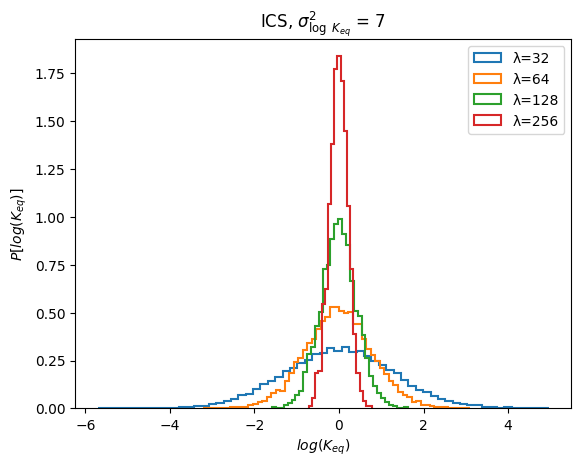

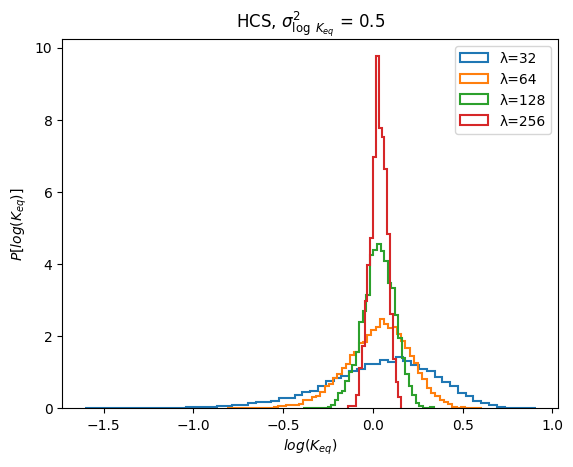

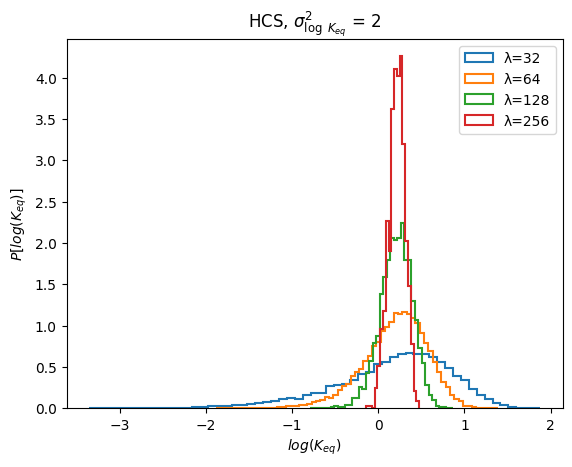

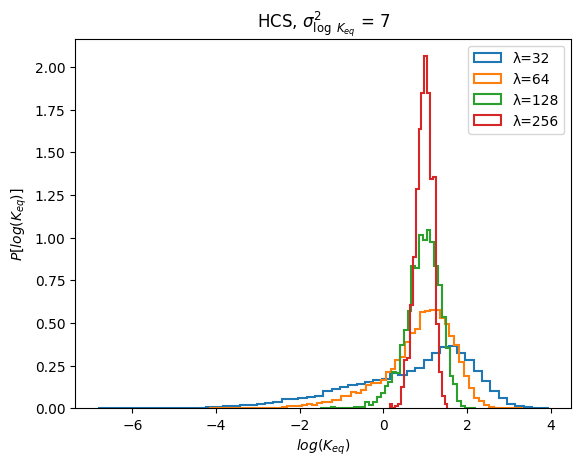

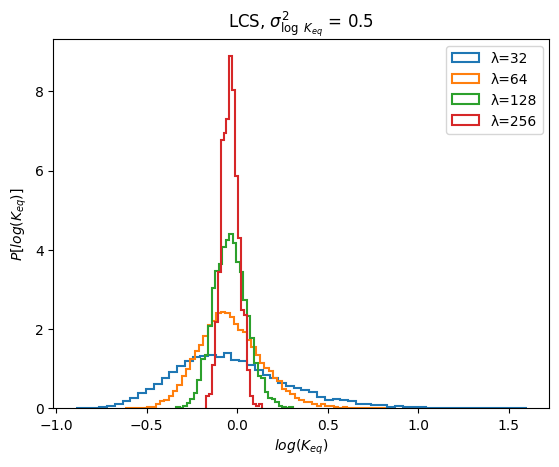

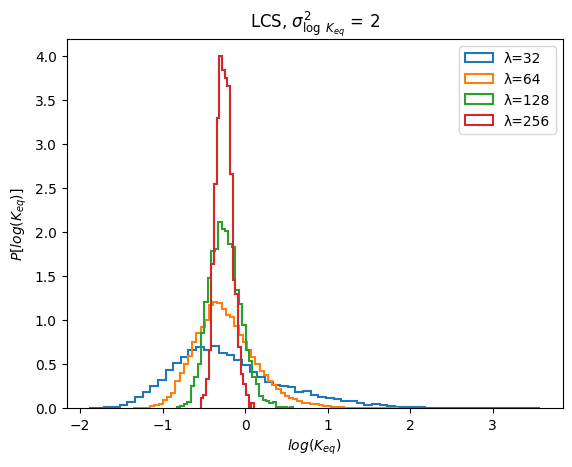

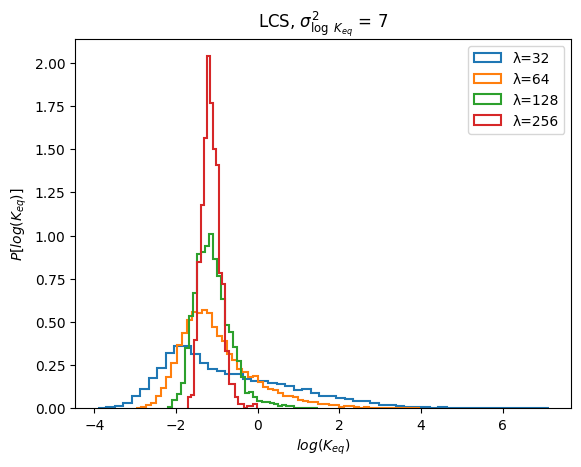

In [83]:
### Probability denisity function ###

scales_hist = [32,64,128,256]
x = np.linspace(-0.3, 0.3, 500)
aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        for iscale in range(len(scales_hist)):
            scale = scales_hist[iscale]
            job = aux_job
            keff = np.array([])
            for iseed in range(nseeds):
                try:
                    aux = np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1)
                    aux = aux[aux>0]
                    aux = aux[~np.isnan(aux)]
                    keff = np.append(keff, aux)
                except:
                    pass
                job += 1
            if icon > 0:
                plt.hist(np.log(keff), bins='scott', density=True, histtype='step', label='\u03BB'+'='+str(scales_hist[iscale]), linewidth=1.5)
                plt.title(st_con[icon]+', '+r"$\sigma^2_{\log\ K_{eq}}$"+' = '+str(var_lab[ivar]))
                plt.xlabel(r'$log(K_{eq})$')
                plt.ylabel(r'$P[log(K_{eq})]$')
                # ax[icon].set_yscale('log')
                plt.tick_params(axis='both')
                plt.legend(frameon=True)
        plt.show()
        plt.close()
        aux_job = job

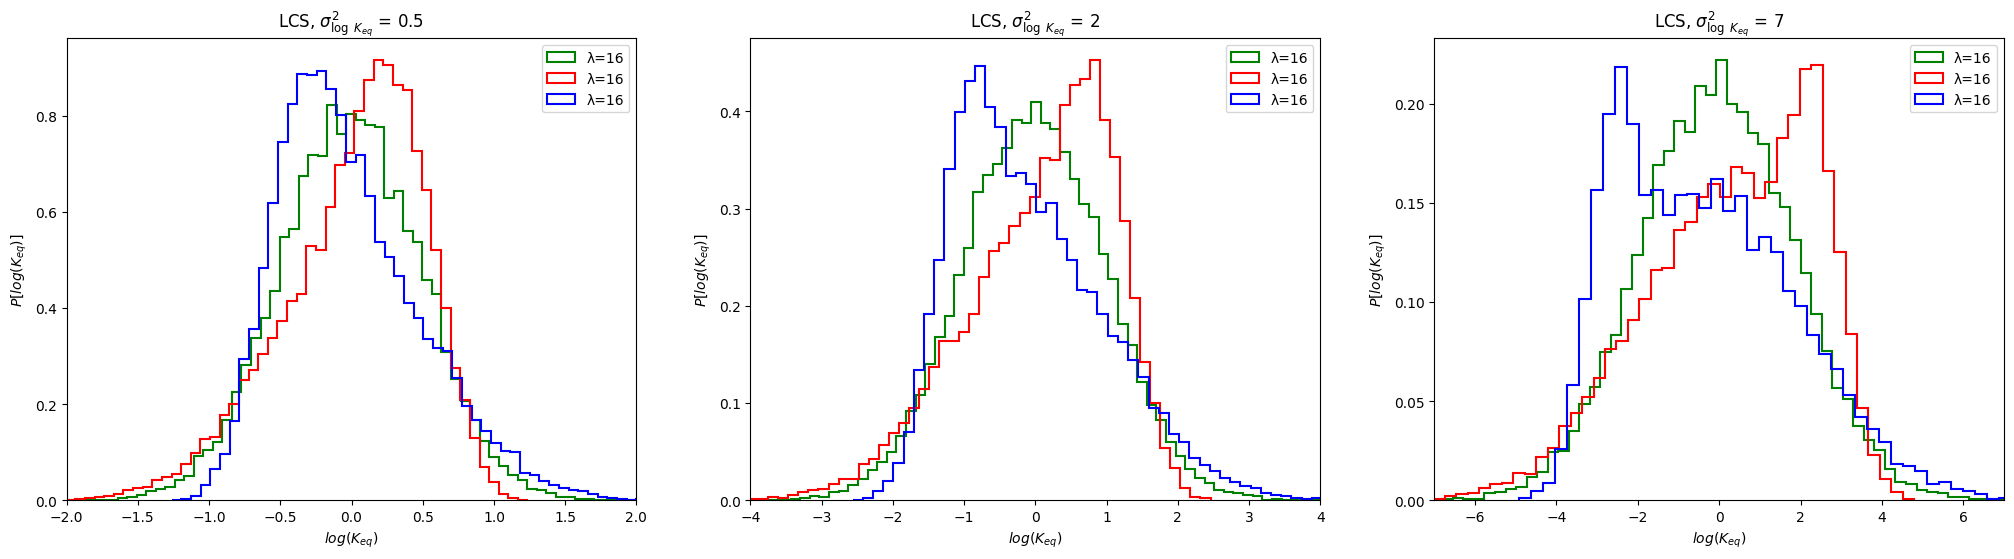

In [82]:
### Probability density function - Skewness comparision ###

scales_hist = [32,64,128,256,512]
x = np.linspace(-0.3, 0.3, 500)

fig, ax = plt.subplots(1, 3, figsize=(25, 6))
scale_graf = 16
xlim = ([-2,2], [-4,4], [-7,7])

aux_job = 0
for icon in range(len(con)):
    for ivar in range(len(var_lab)):
        for iscale in range(len(scales_hist)):
            scale = scales_hist[iscale]
            job = aux_job
            keff = np.array([])
            for iseed in range(nseeds):
                try:
                    aux = np.load(simDir+str(job)+'/KpostProcess/Kperm'+str(scale_graf)+'.npy').reshape(-1)
                    aux = aux[aux>0]
                    aux = aux[~np.isnan(aux)]
                    keff = np.append(keff, aux)
                except:
                    pass
                job += 1
        if icon > 0:
            ax[ivar].hist(np.log(keff), bins='scott', density=True, histtype='step', label='\u03BB'+'='+str(scale_graf), linewidth=1.5, color=color[icon])
            ax[ivar].set_title(st_con[icon]+', '+r"$\sigma^2_{\log\ K_{eq}}$"+' = '+str(var_lab[ivar]))
            ax[ivar].set_xlabel(r'$log(K_{eq})$')
            ax[ivar].set_ylabel(r'$P[log(K_{eq})]$')
            # ax[icon].set_yscale('log')
            ax[ivar].tick_params(axis='both')
            ax[ivar].set_xlim(xlim[ivar])
            ax[ivar].legend(frameon=True)
         
        #ax[ivar].legend(fontsize=16, frameon=True)
        # plt.show()
        # plt.close()
        aux_job = job
        # PDF = 1/(np.sqrt(2*np.pi*np.var(np.log(keff)))) * np.exp(-(x-np.mean(np.log(keff)))**2/(2*np.var(np.log(keff))))
        # ax[ivar].plot(x, PDF, color='black', linewidth=2, label='PDF fit')
